In [1]:
import numpy as np
import pandas as pd
import random
import math
import time
import matplotlib.pyplot as plt
from copy import deepcopy

# Dataset

In [2]:
num_slots = 8

In [3]:
appliance_data = [['Ref', 'NS', 100, 0.5, [1, num_slots]], ['AS', 'NS', 100, 0.1, [1, num_slots]],
                  ['AC1', 'PS', 50, [0.7, 1.4, 0.1], [1, num_slots]],
                  ['AC2', 'PS', 50, [0.7, 1.4, 0.1], [1, num_slots]],
                  ['H', 'PS', 50, [0.5, 1.5, 0.1], [1, num_slots]],
                  ['L1', 'TS', 0.02, 0.7, [5, 7]],
                  ['L2', 'TS', 0.02, 0.7, [4, 7]],
                  ['WM', 'TS', 0.02, 0.7, [6, 8]],
                  ['DW', 'TS', 0.06, 0.3, [6, 8]]]

appliance_df = pd.DataFrame(appliance_data, columns=['Name', 'Type', 'Diss. Coeff.', 'Power Rating (kWh)', 'Time Slot'])
appliance_df

appliance_df = appliance_df.sort_values('Diss. Coeff.', ascending = False)
appliance_df

,Name,Type,Diss. Coeff.,Power Rating (kWh),Time Slot
0,Ref,NS,100.00,0.5,"[1, 8]"
1,AS,NS,100.00,0.1,"[1, 8]"
2,AC1,PS,50.00,"[0.7, 1.4, 0.1]","[1, 8]"
3,AC2,PS,50.00,"[0.7, 1.4, 0.1]","[1, 8]"
4,H,PS,50.00,"[0.5, 1.5, 0.1]","[1, 8]"
8,DW,TS,0.06,0.3,"[6, 8]"
5,L1,TS,0.02,0.7,"[5, 7]"
6,L2,TS,0.02,0.7,"[4, 7]"
7,WM,TS,0.02,0.7,"[6, 8]"


# Electricity Price Generation

In [4]:
ep_mx_q1 = 35
ep_mx_q2 = 35
ep_mx_q3 = 30
ep_mx_q4 = 20
ep_k = 5
min_price = 7

<Figure size 640x480 with 0 Axes>

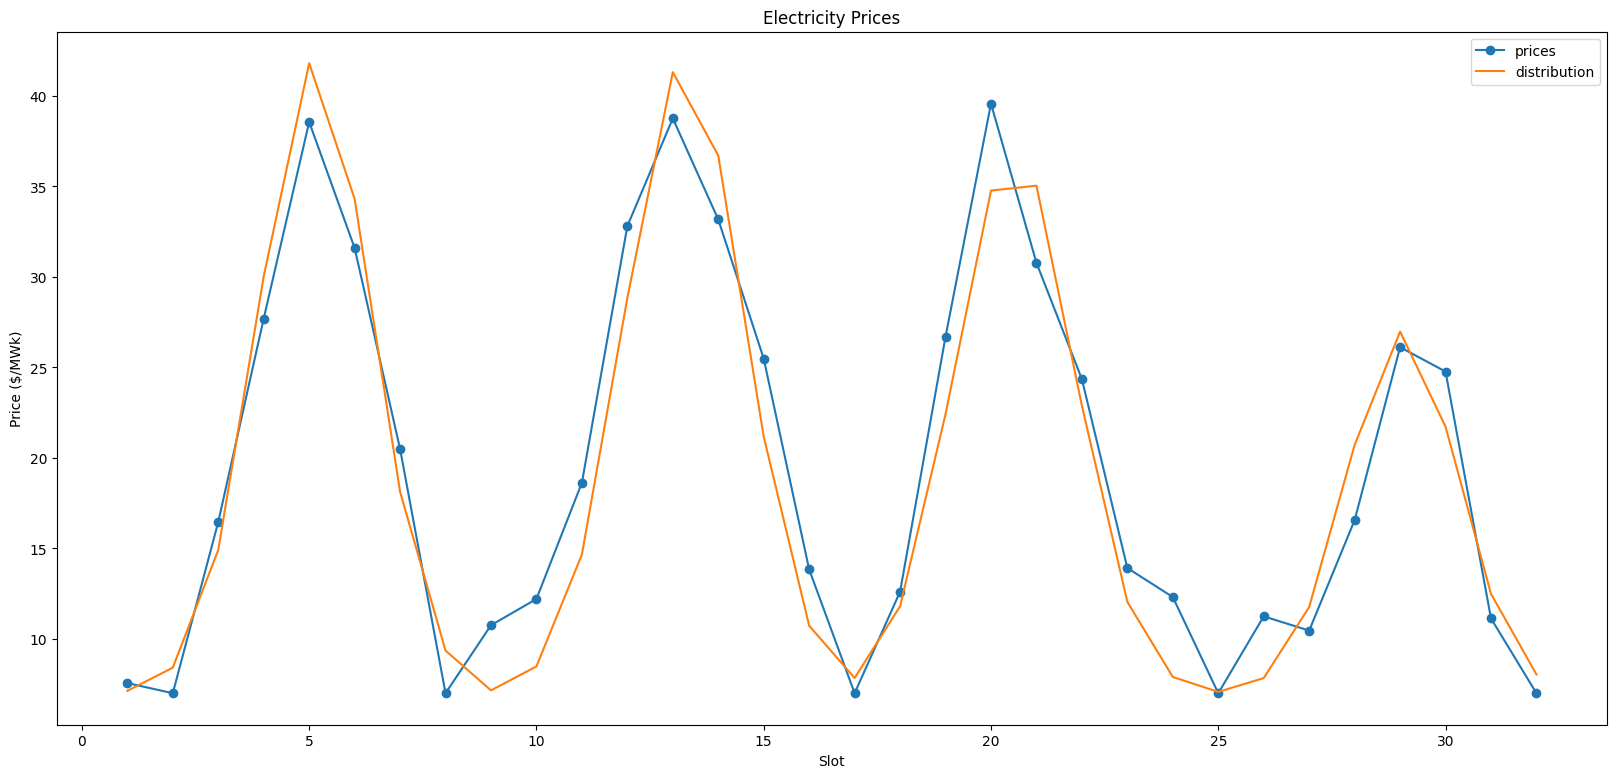

In [5]:
num_points = 1000

mu, sigma = 0, 1.0/(np.sqrt(2 * np.pi) * ep_mx_q1)
s = np.random.normal(mu, sigma, num_points)
count, bins, ignored = plt.hist(s, num_slots, density=True)
plt.clf()
electricity_prices = [max(0, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) + random.uniform(-ep_k, ep_k)) for i in bins[:-1]]
distribution = [1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) for i in bins[:-1]]

mu, sigma = 0, 1.0/(np.sqrt(2 * np.pi) * ep_mx_q2)
s = np.random.normal(mu, sigma, num_points)
count, bins, ignored = plt.hist(s, num_slots, density=True)
plt.clf()
electricity_prices += [max(0, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) + random.uniform(-ep_k, ep_k)) for i in bins[:-1]]
distribution += [1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) for i in bins[:-1]]

mu, sigma = 0, 1.0/(np.sqrt(2 * np.pi) * ep_mx_q3)
s = np.random.normal(mu, sigma, num_points)
count, bins, ignored = plt.hist(s, num_slots, density=True)
plt.clf()
electricity_prices += [max(0, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) + random.uniform(-ep_k, ep_k)) for i in bins[:-1]]
distribution += [1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) for i in bins[:-1]]

mu, sigma = 0, 1.0/(np.sqrt(2 * np.pi) * ep_mx_q4)
s = np.random.normal(mu, sigma, num_points)
count, bins, ignored = plt.hist(s, num_slots, density=True)
plt.clf()
electricity_prices += [max(0, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) + random.uniform(-ep_k, ep_k)) for i in bins[:-1]]
distribution += [1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) for i in bins[:-1]]

electricity_prices = [i + min_price for i in electricity_prices]
distribution = [i + min_price for i in distribution]

slots = range(1, 4*num_slots+1)
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(9)
plt.title("Electricity Prices")
plt.xlabel("Slot")
plt.ylabel("Price ($/MWk)")
plt.plot(slots, electricity_prices, "-o", label = "prices")
plt.plot(slots, distribution, label = "distribution")
plt.legend()
plt.show()

# Solar Power Generation

In [6]:
sp_mx_q1 = 200
sp_mx_q2 = 200
sp_mx_q3 = 250
sp_mx_q4 = 100
sp_k = 20

<Figure size 640x480 with 0 Axes>

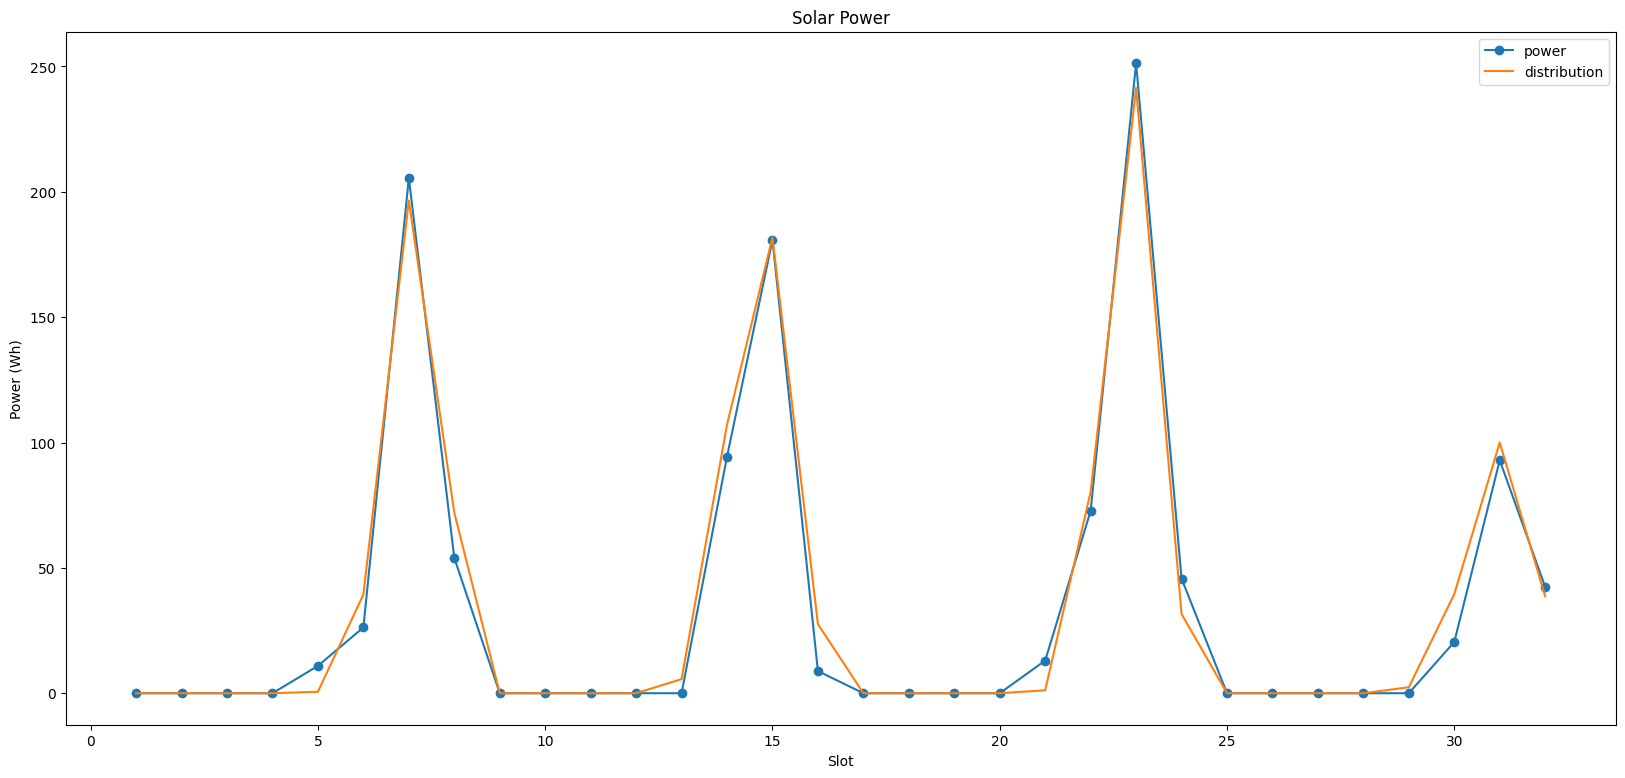

In [7]:
num_points = 1000

solar_power = [0.0 for i in range(num_slots - num_slots//2)]
distribution = [0.0 for i in range(num_slots - num_slots//2)]

mu, sigma = 0, 1.0/(np.sqrt(2 * np.pi) * sp_mx_q1)
s = np.random.normal(mu, sigma, num_points)
count, bins, ignored = plt.hist(s, num_slots//2, density=True)
plt.clf()
solar_power += [max(0, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) + random.uniform(-sp_k, sp_k)) for i in bins[:-1]]
distribution += [1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) for i in bins[:-1]]

solar_power += [0.0 for i in range(num_slots - num_slots//2)]
distribution += [0.0 for i in range(num_slots - num_slots//2)]

mu, sigma = 0, 1.0/(np.sqrt(2 * np.pi) * sp_mx_q2)
s = np.random.normal(mu, sigma, num_points)
count, bins, ignored = plt.hist(s, num_slots//2, density=True)
plt.clf()
solar_power += [max(0, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) + random.uniform(-sp_k, sp_k)) for i in bins[:-1]]
distribution += [1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) for i in bins[:-1]]

solar_power += [0.0 for i in range(num_slots - num_slots//2)]
distribution += [0.0 for i in range(num_slots - num_slots//2)]

mu, sigma = 0, 1.0/(np.sqrt(2 * np.pi) * sp_mx_q3)
s = np.random.normal(mu, sigma, num_points)
count, bins, ignored = plt.hist(s, num_slots//2, density=True)
plt.clf()
solar_power += [max(0, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) + random.uniform(-sp_k, sp_k)) for i in bins[:-1]]
distribution += [1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) for i in bins[:-1]]

solar_power += [0.0 for i in range(num_slots - num_slots//2)]
distribution += [0.0 for i in range(num_slots - num_slots//2)]

mu, sigma = 0, 1.0/(np.sqrt(2 * np.pi) * sp_mx_q4)
s = np.random.normal(mu, sigma, num_points)
count, bins, ignored = plt.hist(s, num_slots//2, density=True)
plt.clf()
solar_power += [max(0, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) + random.uniform(-sp_k, sp_k)) for i in bins[:-1]]
distribution += [1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) for i in bins[:-1]]


slots = range(1,  4*num_slots+1)
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(9)
plt.title("Solar Power")
plt.xlabel("Slot")
plt.ylabel("Power (Wh)")
plt.plot(slots, solar_power, "-o", label = "power")
plt.plot(slots, distribution, label = "distribution")
plt.legend()
plt.show()

In [8]:
states = []
for i in range(1, num_slots + 1):
    price = electricity_prices[i-1]
    if i == 7:
        price = 5
    states.append((price, solar_power[i-1]))

states

[(7.561229357735169, 0.0),
 (7, 0.0),
 (16.464442584202423, 0.0),
 (27.702150595716297, 0.0),
 (38.560366710049315, 10.905436531378667),
 (31.59773714083708, 26.241815310100343),
 (5, 205.4877407142683),
 (7, 53.99170376011732)]

In [9]:
agents = appliance_df['Name'].tolist()
agent_actions = {}
for agent in agents:
    agent_data = appliance_df.loc[appliance_df['Name'] == agent]
    if (agent_data['Type'] == 'NS').bool():
        agent_actions[agent] = ['on']
    elif (agent_data['Type'] == 'PS').bool():
        pr = agent_data['Power Rating (kWh)'].tolist()[0]
        agent_actions[agent] = [round(i, 1) for i in np.arange(pr[0], pr[1] + pr[2], pr[2])]
    elif (agent_data['Type'] == 'TS').bool():
        agent_actions[agent] = ['on', 'off']
agent_actions

{'Ref': ['on'],
 'AS': ['on'],
 'AC1': [0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4],
 'AC2': [0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4],
 'H': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5],
 'DW': ['on', 'off'],
 'L1': ['on', 'off'],
 'L2': ['on', 'off'],
 'WM': ['on', 'off']}

In [10]:
def in_slot(t, ts):
    if t + 1 >= ts[0] and t + 1 <= ts[1]:
            return True
    return False

In [11]:
without_DR_actions = {}
for t in range(num_slots):
    without_DR_actions[t] = {}
    for agent in agents:
        without_DR_actions[t][agent] = None
        act = None
        agent_data = appliance_df.loc[appliance_df['Name'] == agent]
        if (agent_data['Type'] == 'NS').bool():
            ts = agent_data['Time Slot'].tolist()[0]
            if in_slot(t, ts):
                pr = agent_data['Power Rating (kWh)'].tolist()[0]
                act = 'on'
        elif (agent_data['Type'] == 'PS').bool():
            ts = agent_data['Time Slot'].tolist()[0]
            if in_slot(t, ts):
                pr = agent_data['Power Rating (kWh)'].tolist()[0]
                act = pr[1]
        elif (agent_data['Type'] == 'TS').bool():
            ts = agent_data['Time Slot'].tolist()[0]
            if in_slot(t, ts):
                pr = agent_data['Power Rating (kWh)'].tolist()[0]
                if t + 1 == ts[0]:
                    act = 'on'
                else:
                    act = 'off'
        without_DR_actions[t][agent] = act

# Multi-Agent Q Learning

Agents take that action which maximizes their own expected cumulative reward.

In [12]:
cols = ['Name', 'Type', 'Diss. Coeff.', 'Power Rating (kWh)', 'Time Slot']

def get_reward_DR(st, t, agent, act, started):
    reward = 0.0
    cost = 0.0
    agent_data = appliance_df.loc[appliance_df['Name'] == agent]
    if (agent_data['Type'] == 'NS').bool():
        ts = agent_data['Time Slot'].tolist()[0]
        if in_slot(t, ts):
            pr = agent_data['Power Rating (kWh)'].tolist()[0]
            reward = (-st[0] * max(0, (pr)))
            cost = (-st[0] * max(0, (pr)))
    elif (agent_data['Type'] == 'PS').bool():
        ts = agent_data['Time Slot'].tolist()[0]
        if in_slot(t, ts):
            pr = agent_data['Power Rating (kWh)'].tolist()[0]
            dc = agent_data['Diss. Coeff.'].tolist()[0]
            reward = ((-st[0] * max(0, (act))) - (dc * math.pow(pr[1] - act, 2)))
            cost = (-st[0] * max(0, (act)))
    elif (agent_data['Type'] == 'TS').bool():
        ts = agent_data['Time Slot'].tolist()[0]
        if in_slot(t, ts):
            pr = agent_data['Power Rating (kWh)'].tolist()[0]
            dc = agent_data['Diss. Coeff.'].tolist()[0]
            if (act == 'on' or (t + 1 == ts[1])) and started[agent] != 1:
                reward = - (st[0] * max(0, pr) - (dc * math.pow(ts[0] - t - 1, 2)))
                cost = (-st[0] * max(0, (pr)))
                started[agent] = 1
    return round(reward, 6), cost, started

def get_reward_without_DR(st, t, agent):
    reward = 0.0
    cost = 0.0
    agent_data = appliance_df.loc[appliance_df['Name'] == agent]
    if (agent_data['Type'] == 'NS').bool():
        ts = agent_data['Time Slot'].tolist()[0]
        if in_slot(t, ts):
            pr = agent_data['Power Rating (kWh)'].tolist()[0]
            reward = (-st[0] * max(0, (pr)))
            cost = (-st[0] * max(0, (pr)))
    elif (agent_data['Type'] == 'PS').bool():
        ts = agent_data['Time Slot'].tolist()[0]
        if in_slot(t, ts):
            pr = agent_data['Power Rating (kWh)'].tolist()[0]
            reward = (-st[0] * max(0, (pr[1])))
            cost = (-st[0] * max(0, (pr[1])))

    elif (agent_data['Type'] == 'TS').bool():
        ts = agent_data['Time Slot'].tolist()[0]
        if in_slot(t, ts):
            pr = agent_data['Power Rating (kWh)'].tolist()[0]
            if t + 1 == ts[0]:
                reward = - (st[0] * max(0, pr))
                cost = - (st[0] * max(0, pr))
    return round(reward, 6), cost


started = {}
for agent in agents:
        started[agent] = 0
print(get_reward_DR(states[6], 6, 'WM', 'on', started))
print(get_reward_without_DR(states[6], 6, 'WM'))

(-3.48, -3.5, {'Ref': 0, 'AS': 0, 'AC1': 0, 'AC2': 0, 'H': 0, 'DW': 0, 'L1': 0, 'L2': 0, 'WM': 1})
(0.0, 0.0)


In [13]:
num_timeslots = num_slots
num_episodes = 1000
epsilon = 0.3

gamma = 0.9
theta = 0.3

converged = 1
threshold = 0.001

recommendations = {}
actually_started = {}

for t in range(num_timeslots):
    actually_started[t] = {}
    for agent in agents:
        actually_started[t][agent] = 0

started = {}
for agent in agents:
        started[agent] = 0

Without_DR_total_reward = 0.0
With_DR_total_reward = 0.0

Without_DR_total_electricity_cost = 0.0
With_DR_total_electricity_cost = 0.0

average_time = 0

for t in range(num_timeslots):
    print('Slot: ', t + 1)
    start = time.time()
    recommendations[t] = {}
    Q = {}
    Q_prev = {}
    R = {}
    C = {}
    for st in states:
        Q[st] = {}
        Q_prev[st] = {}
        R[st] = {}
        C[st] = {}
        for agent in agents:
            Q[st][agent] = {}
            Q_prev[st][agent] = {}
            R[st][agent] = {}
            C[st][agent] = {}
            recommendations[t][agent] = None
    converged = 1
    for agent in agents:
        print('Appliance: ', agent)
        for st in states:
            for act in agent_actions[agent]:
                Q[st][agent][act] = 0.0
                Q_prev[st][agent][act] = 0.0
        if t > 0:
            started[agent] = actually_started[t - 1][agent]
        else:
            started[agent] = 0
        for eps in range(num_episodes):
            if t > 0:
                if actually_started[t-1][agent] != 1:
                    started[agent] = 0
            else:
                started[agent] = 0
            Q_prev = deepcopy(Q)
            st = states[t]
            itr = 0
            curr_t = t
            while curr_t < num_slots - 1:
                p = np.random.random()
                if p < epsilon:
                    j = np.random.choice(len(agent_actions[agent]))
                else:
                    j = np.argmax([Q[st][agent][a] for a in agent_actions[agent]])
                at = agent_actions[agent][j]
                sdash = states[curr_t + 1]
                R[st][agent][at], C[st][agent][at], started = get_reward_DR(st, curr_t, agent, at, started)
                Q[st][agent][at] = Q[st][agent][at] + theta * (R[st][agent][at] + gamma * max([Q[sdash][agent][act] for act in agent_actions[agent]]) - Q[st][agent][at])
                st = sdash
                curr_t += 1
            converged = 1
            for s in states:
                for a in agent_actions[agent]:
                    if abs(Q[s][agent][a] - Q_prev[s][agent][a]) > threshold:
                        converged = 0
            if converged == 1:
                conv_eps = eps
                break
        recommendations[t][agent] = agent_actions[agent][np.argmax([Q[states[t]][agent][a] for a in agent_actions[agent]])]
        agent_data = appliance_df.loc[appliance_df['Name'] == agent]
        slot = agent_data['Time Slot'].tolist()[0]
        if not in_slot(t, slot):
            recommendations[t][agent] = None
        if (appliance_df.loc[appliance_df['Name'] == agent]['Type'] == 'TS').bool() and actually_started[t][agent] == 1:
            recommendations[t][agent] = 'off'
        if recommendations[t][agent] == 'on' and (appliance_df.loc[appliance_df['Name'] == agent]['Type'] == 'TS').bool():
            if t + 1 < num_timeslots:
                actually_started[t + 1][agent] = 1
        if recommendations[t][agent] == 'off' and (appliance_df.loc[appliance_df['Name'] == agent]['Type'] == 'TS').bool() and actually_started[t][agent] == 0 and t + 1 ==  slot[1]:
            if t + 1 < num_timeslots:
                actually_started[t + 1][agent] = 1
            recommendations[t][agent] = 'on'
    print(converged)
    end = time.time()
    print('Time taken to recommend (s): ', end-start)
    average_time += (end-start)
    print("Slot: ", t + 1, " | Recommendations: ", recommendations[t])


Slot:  1
Appliance:  Ref
Appliance:  AS
Appliance:  AC1
Appliance:  AC2
Appliance:  H
Appliance:  DW
Appliance:  L1
Appliance:  L2
Appliance:  WM
1
Time taken to recommend (s):  50.366931200027466
Slot:  1  | Recommendations:  {'Ref': 'on', 'AS': 'on', 'AC1': 1.3, 'AC2': 1.3, 'H': 1.4, 'DW': None, 'L1': None, 'L2': None, 'WM': None}
Slot:  2
Appliance:  Ref
Appliance:  AS
Appliance:  AC1
Appliance:  AC2
Appliance:  H
Appliance:  DW
Appliance:  L1
Appliance:  L2
Appliance:  WM
1
Time taken to recommend (s):  18.853424549102783
Slot:  2  | Recommendations:  {'Ref': 'on', 'AS': 'on', 'AC1': 1.3, 'AC2': 1.3, 'H': 1.4, 'DW': None, 'L1': None, 'L2': None, 'WM': None}
Slot:  3
Appliance:  Ref
Appliance:  AS
Appliance:  AC1
Appliance:  AC2
Appliance:  H
Appliance:  DW
Appliance:  L1
Appliance:  L2
Appliance:  WM
1
Time taken to recommend (s):  15.9865882396698
Slot:  3  | Recommendations:  {'Ref': 'on', 'AS': 'on', 'AC1': 1.2, 'AC2': 1.2, 'H': 1.3, 'DW': None, 'L1': None, 'L2': None, 'WM': Non

In [14]:
Appliance_Without_DR_Cost = {}
Appliance_With_DR_Cost = {}

Timeslot_Without_DR_Cost = {}
Timeslot_With_DR_Cost = {}

Appliance_Without_DR_Reward = {}
Appliance_With_DR_Reward = {}

Without_DR_total_reward = 0
With_DR_total_reward = 0
Without_DR_total_electricity_cost = 0
With_DR_total_electricity_cost = 0

for agent in agents:
    Appliance_Without_DR_Cost[agent] = 0
    Appliance_With_DR_Cost[agent] = 0
    Appliance_Without_DR_Reward[agent] = 0
    Appliance_With_DR_Reward[agent] = 0

for t in range(num_timeslots):
    Timeslot_Without_DR_Cost[t] = 0
    Timeslot_With_DR_Cost[t] = 0
    for agent in agents:
        temp = deepcopy(actually_started)

        rew, c, actually_started[t] = get_reward_DR(states[t], t, agent, recommendations[t][agent], actually_started[t])
        actually_started = temp
        With_DR_total_reward += rew
        Appliance_With_DR_Reward[agent] -= rew
        With_DR_total_electricity_cost += c
        Appliance_With_DR_Cost[agent] -= c
        Timeslot_With_DR_Cost[t] -= c

        rew, c = get_reward_without_DR(states[t], t, agent)
        Without_DR_total_reward += rew
        Appliance_Without_DR_Reward[agent] -= rew
        Without_DR_total_electricity_cost += c
        Appliance_Without_DR_Cost[agent] -= c
        Timeslot_Without_DR_Cost[t] -= c

In [15]:
for t in range(num_timeslots):
    print("Slot: ", t + 1, " | Recommendations: ", recommendations[t])
    print("Slot: ", t + 1, " | Original Actions: ", without_DR_actions[t])
    print()

Slot:  1  | Recommendations:  {'Ref': 'on', 'AS': 'on', 'AC1': 1.3, 'AC2': 1.3, 'H': 1.4, 'DW': None, 'L1': None, 'L2': None, 'WM': None}
Slot:  1  | Original Actions:  {'Ref': 'on', 'AS': 'on', 'AC1': 1.4, 'AC2': 1.4, 'H': 1.5, 'DW': None, 'L1': None, 'L2': None, 'WM': None}

Slot:  2  | Recommendations:  {'Ref': 'on', 'AS': 'on', 'AC1': 1.3, 'AC2': 1.3, 'H': 1.4, 'DW': None, 'L1': None, 'L2': None, 'WM': None}
Slot:  2  | Original Actions:  {'Ref': 'on', 'AS': 'on', 'AC1': 1.4, 'AC2': 1.4, 'H': 1.5, 'DW': None, 'L1': None, 'L2': None, 'WM': None}

Slot:  3  | Recommendations:  {'Ref': 'on', 'AS': 'on', 'AC1': 1.2, 'AC2': 1.2, 'H': 1.3, 'DW': None, 'L1': None, 'L2': None, 'WM': None}
Slot:  3  | Original Actions:  {'Ref': 'on', 'AS': 'on', 'AC1': 1.4, 'AC2': 1.4, 'H': 1.5, 'DW': None, 'L1': None, 'L2': None, 'WM': None}

Slot:  4  | Recommendations:  {'Ref': 'on', 'AS': 'on', 'AC1': 1.1, 'AC2': 1.1, 'H': 1.2, 'DW': None, 'L1': None, 'L2': 'off', 'WM': None}
Slot:  4  | Original Action

In [16]:
from IPython.display import display
recom_data = {}
Recom_df = {}
for agent in agents:
    print('\n\nAppliance: ', agent, ' | Dis. Coef.: ', appliance_df.loc[appliance_df['Name'] == agent]['Diss. Coeff.'].tolist()[0])
    recom_data[agent] = [[t+1, without_DR_actions[t][agent], recommendations[t][agent], states[t][0]] for t in range(num_timeslots)]
    Recom_df[agent] = pd.DataFrame(recom_data[agent], columns=['Slot', 'Action without DR', 'Action with DR', 'Elec. Price ($/MWk)'])
    display(Recom_df[agent])



Appliance:  Ref  | Dis. Coef.:  100.0


,Slot,Action without DR,Action with DR,Elec. Price ($/MWk)
0,1,on,on,7.561229
1,2,on,on,7.000000
2,3,on,on,16.464443
3,4,on,on,27.702151
4,5,on,on,38.560367
5,6,on,on,31.597737
6,7,on,on,5.000000
7,8,on,on,7.000000




Appliance:  AS  | Dis. Coef.:  100.0


,Slot,Action without DR,Action with DR,Elec. Price ($/MWk)
0,1,on,on,7.561229
1,2,on,on,7.000000
2,3,on,on,16.464443
3,4,on,on,27.702151
4,5,on,on,38.560367
5,6,on,on,31.597737
6,7,on,on,5.000000
7,8,on,on,7.000000




Appliance:  AC1  | Dis. Coef.:  50.0


,Slot,Action without DR,Action with DR,Elec. Price ($/MWk)
0,1,1.4,1.3,7.561229
1,2,1.4,1.3,7.000000
2,3,1.4,1.2,16.464443
3,4,1.4,1.1,27.702151
4,5,1.4,1.0,38.560367
5,6,1.4,1.1,31.597737
6,7,1.4,1.4,5.000000
7,8,1.4,0.7,7.000000




Appliance:  AC2  | Dis. Coef.:  50.0


,Slot,Action without DR,Action with DR,Elec. Price ($/MWk)
0,1,1.4,1.3,7.561229
1,2,1.4,1.3,7.000000
2,3,1.4,1.2,16.464443
3,4,1.4,1.1,27.702151
4,5,1.4,1.0,38.560367
5,6,1.4,1.1,31.597737
6,7,1.4,1.4,5.000000
7,8,1.4,0.7,7.000000




Appliance:  H  | Dis. Coef.:  50.0


,Slot,Action without DR,Action with DR,Elec. Price ($/MWk)
0,1,1.5,1.4,7.561229
1,2,1.5,1.4,7.000000
2,3,1.5,1.3,16.464443
3,4,1.5,1.2,27.702151
4,5,1.5,1.1,38.560367
5,6,1.5,1.2,31.597737
6,7,1.5,1.5,5.000000
7,8,1.5,0.5,7.000000




Appliance:  DW  | Dis. Coef.:  0.06


,Slot,Action without DR,Action with DR,Elec. Price ($/MWk)
0,1,None,None,7.561229
1,2,None,None,7.000000
2,3,None,None,16.464443
3,4,None,None,27.702151
4,5,None,None,38.560367
5,6,on,off,31.597737
6,7,off,off,5.000000
7,8,off,on,7.000000




Appliance:  L1  | Dis. Coef.:  0.02


,Slot,Action without DR,Action with DR,Elec. Price ($/MWk)
0,1,None,None,7.561229
1,2,None,None,7.000000
2,3,None,None,16.464443
3,4,None,None,27.702151
4,5,on,off,38.560367
5,6,off,off,31.597737
6,7,off,on,5.000000
7,8,None,off,7.000000




Appliance:  L2  | Dis. Coef.:  0.02


,Slot,Action without DR,Action with DR,Elec. Price ($/MWk)
0,1,None,None,7.561229
1,2,None,None,7.000000
2,3,None,None,16.464443
3,4,on,off,27.702151
4,5,off,off,38.560367
5,6,off,off,31.597737
6,7,off,on,5.000000
7,8,None,off,7.000000




Appliance:  WM  | Dis. Coef.:  0.02


,Slot,Action without DR,Action with DR,Elec. Price ($/MWk)
0,1,None,None,7.561229
1,2,None,None,7.000000
2,3,None,None,16.464443
3,4,None,None,27.702151
4,5,None,None,38.560367
5,6,on,off,31.597737
6,7,off,off,5.000000
7,8,off,on,7.000000


In [17]:
states

[(7.561229357735169, 0.0),
 (7, 0.0),
 (16.464442584202423, 0.0),
 (27.702150595716297, 0.0),
 (38.560366710049315, 10.905436531378667),
 (31.59773714083708, 26.241815310100343),
 (5, 205.4877407142683),
 (7, 53.99170376011732)]

In [18]:
appliance_df

,Name,Type,Diss. Coeff.,Power Rating (kWh),Time Slot
0,Ref,NS,100.00,0.5,"[1, 8]"
1,AS,NS,100.00,0.1,"[1, 8]"
2,AC1,PS,50.00,"[0.7, 1.4, 0.1]","[1, 8]"
3,AC2,PS,50.00,"[0.7, 1.4, 0.1]","[1, 8]"
4,H,PS,50.00,"[0.5, 1.5, 0.1]","[1, 8]"
8,DW,TS,0.06,0.3,"[6, 8]"
5,L1,TS,0.02,0.7,"[5, 7]"
6,L2,TS,0.02,0.7,"[4, 7]"
7,WM,TS,0.02,0.7,"[6, 8]"


## Assuming Recommendations are followed, cost with and w/o Demand Response

In [19]:
print('\n\nTotal reward without DR: ', Without_DR_total_reward)
print('Total reward with DR: ', With_DR_total_reward)

print('Total electricity cost without DR: ', -Without_DR_total_electricity_cost)
print('Total electricity cost with DR: ', -With_DR_total_electricity_cost)

print('Average Recommendation Time: ', average_time / num_timeslots)

print()
print()

dc = appliance_df['Diss. Coeff.'].tolist()
DC = {}
i = 0
for agent in agents:
    DC[agent] = dc[i]
    i += 1



Total reward without DR:  -768.3225390000001
Total reward with DR:  -732.0716670000002
Total electricity cost without DR:  768.3225385587202
Total electricity cost with DR:  573.6516659310482
Average Recommendation Time:  14.34883576631546


